# Twitter Airline Sentiment Analysis Exploratory Data Analysis

## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.


## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## About Dataset:

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone
 

# Data Summary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
# sns.set_palette("dark")
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import spacy; 
spacy.load('en_core_web_sm')

In [3]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debaditc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debaditc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\debaditc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Read dataset

In [4]:
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Relevant features in Dataset:

- tweet_id :  ID of tweet
- airline_sentiment : The sentiment of tweet. It can be positive or negative or neutral
- negativereason : its a categorical feature showing reason of negative tweet
- airline : Name of airline. Categorical feature with six values
- text : contents of tweet

In [5]:
df.shape

(14640, 15)

## Dataset details
- 14640 records
- No of columns : 15

## Remove duplicates

In [6]:
duplicateDFRow = df[df.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(72, 15)

In [7]:
#removing duplicates
df.drop_duplicates(keep='first',inplace=True)

In [8]:
duplicateDFRow = df[df.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape[0]

0

## New Dataset shape

In [9]:
df.shape

(14604, 15)

## Select features from new Dataframe

In [10]:
twDF=df[['tweet_id','airline_sentiment','negativereason','airline','text','tweet_coord']]
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text,tweet_coord
0,570306133677760513,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,NaN
1,570301130888122368,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,NaN
2,570301083672813571,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,NaN
3,570301031407624196,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,NaN
4,570300817074462722,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,NaN


In [11]:
twDF.shape

(14604, 6)

## Remove duplicates from new dataset

In [12]:
#There are duplicates
duplicateDFRow = twDF[twDF.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(144, 6)

In [13]:
# Removing duplicates
twDF.drop_duplicates(keep='first',inplace=True)

In [14]:
twDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14532 entries, 0 to 14639
Data columns (total 6 columns):
tweet_id             14532 non-null int64
airline_sentiment    14532 non-null object
negativereason       9118 non-null object
airline              14532 non-null object
text                 14532 non-null object
tweet_coord          1010 non-null object
dtypes: int64(1), object(5)
memory usage: 794.7+ KB


# Exploratory Data Analysis

## Pie chart of Tweets

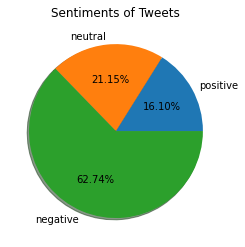

In [15]:
ST = twDF.groupby('airline_sentiment').agg('count')
plt.pie(ST.tweet_id.sort_values(), labels=ST.tweet_id.sort_values().index,autopct='%4.2f%%', shadow=True )
plt.title("Sentiments of Tweets")
plt.show()

### Observations on pie chart

1. Negative sentiments > (positve and neutral sentiments)

2. Neutral sentiments > positive sentiments


## Number of tweets for every Airline

Text(0.5, 1.0, 'Number of tweets for every Airline')

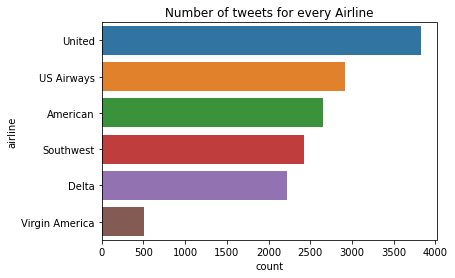

In [16]:
sns.countplot(data=twDF,y=twDF['airline'],order = twDF['airline'].value_counts().index).set_title('Number of tweets for every Airline')

### Observations on Count plot

1. Maximum number of tweets : United Airlines

2. Minimum number of tweets : Virgin America


## Tweets for every Airline with sentiment distribution

Text(0.5, 1.0, 'Tweets for every Airline with sentiment distribution')

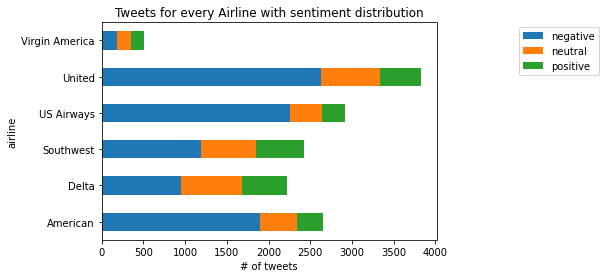

In [17]:
types = twDF.groupby("airline")['airline_sentiment'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel("# of tweets")
plt.title("Tweets for every Airline with sentiment distribution")

### Observations on Bar plot

1. United Airline has more number of negative tweets than neutral and positive combined. Same for US Airways and American airways.

2. Virgin America Airline has almost similar number of negative, neutral and positive tweets.


## Distribution of Number of negative tweets for every Airline

Text(0.5, 1.0, 'Distribution of Number of negative tweets for every Airline')

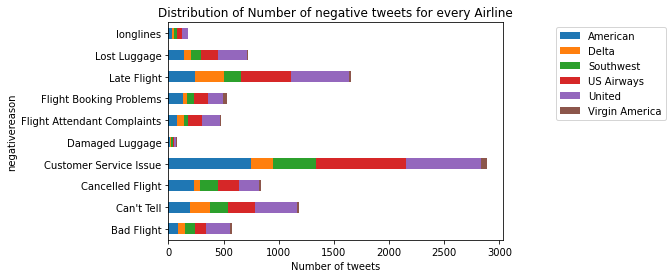

In [18]:
types = twDF.groupby("negativereason")['airline'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel('Number of tweets')
plt.title('Distribution of Number of negative tweets for every Airline')

### Observations on bar chart

1. Max -ve reason : Customer Service issue

2. Min -ve reason : Damaged luggage and Long lines

## Percentage wise Distribution of Number of negative tweets for every Airline

Text(0.5, 1.0, 'Percentage wise Distribution of Number of negative tweets for every Airline')

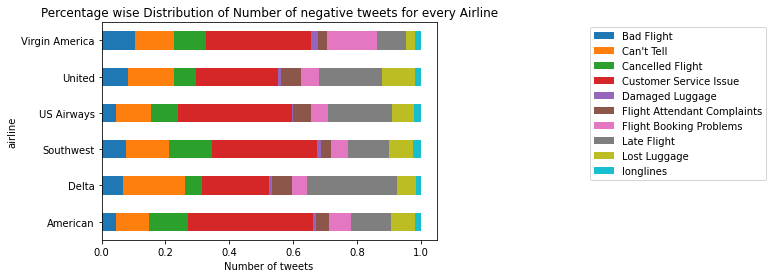

In [19]:
types = twDF.groupby("airline")['negativereason'].value_counts(normalize=True).unstack()
types.plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(2, 1), loc='upper right')
plt.xlabel('Number of tweets')
plt.title('Percentage wise Distribution of Number of negative tweets for every Airline')

### Observations on Horizonatal Bar chart

1. Delta and united airlines have good customer service and have better flights service (cancellations are less)

2. Virgin America need both better flight booking system

3. Delta has to improve on late flights and schedule


Text(0.5, 1.0, 'Tweets Frequency by Airline')

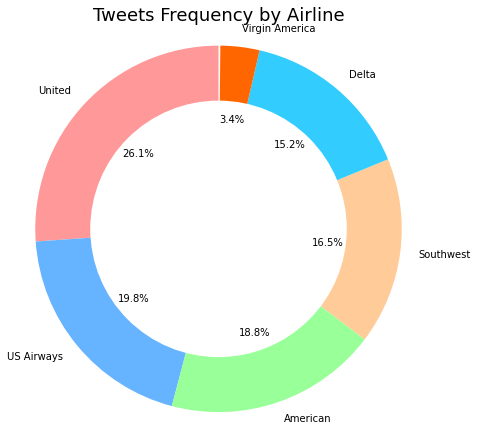

In [20]:
#Pie chart of tweets frequency for each airline
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [0.261, 0.198, 0.188, 0.165, 0.152, 0.0344]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#33ccff', '#ff6600']
fig1, ax1 = plt.subplots(figsize=(6.5, 6))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Tweets Frequency by Airline', fontsize=18)

Text(0, 0.5, 'Mood')

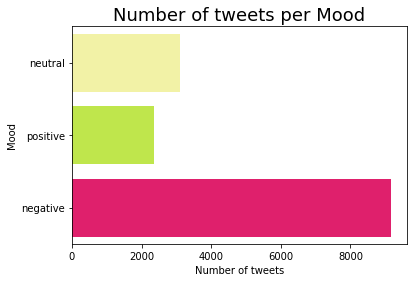

In [21]:
sns.countplot(y='airline_sentiment', data=df, palette=['#ffff99','#ccff33','#ff0066'])
plt.title('Number of tweets per Mood', fontsize=18)
plt.xlabel('Number of tweets')
plt.ylabel('Mood')

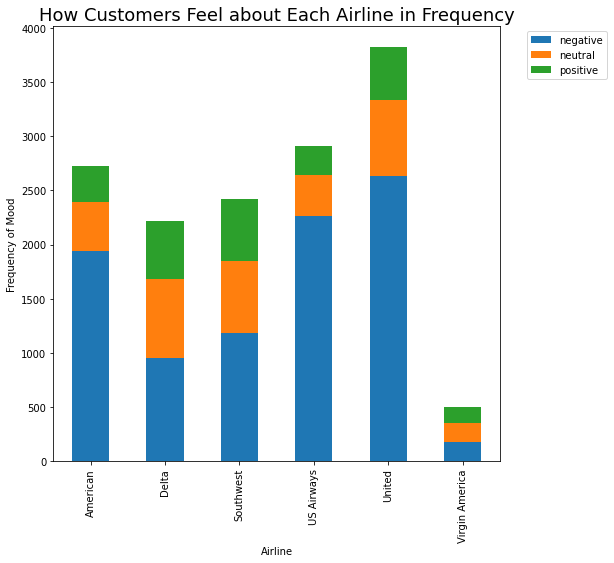

In [22]:
#Visualize sentiment per airline
_ = pd.crosstab(df.airline, df.airline_sentiment).plot(kind="bar",title='How Customers Feel about Each Airline in Frequency',figsize=(8,8),stacked=True)
_.title.set_size(18)
_.set_xlabel('Airline')
_.set_ylabel('Frequency of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Preprocessing Text feature

In [23]:
twDF=twDF.drop(['tweet_coord'],axis=1)
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text
0,570306133677760513,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


## Remove @ and airline name from text

In [24]:
twDF['text']=twDF['text'].str.replace('@VirginAmerica','')
twDF['text']=twDF['text'].str.replace('@united','')
twDF['text']=twDF['text'].str.replace('@SouthwestAir','')
twDF['text']=twDF['text'].str.replace('@JetBlue','')
twDF['text']=twDF['text'].str.replace('@AmericanAir','')
twDF['text']=twDF['text'].str.replace('@USAirways','')
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text
0,570306133677760513,neutral,NaN,Virgin America,What @dhepburn said.
1,570301130888122368,positive,NaN,Virgin America,plus you've added commercials to the experien...
2,570301083672813571,neutral,NaN,Virgin America,I didn't today... Must mean I need to take an...
3,570301031407624196,negative,Bad Flight,Virgin America,"it's really aggressive to blast obnoxious ""en..."
4,570300817074462722,negative,Can't Tell,Virgin America,and it's a really big bad thing about it


## Decontractions

A contraction is a shortened form of a word (or group of words) that omits certain letters or sounds.
Example : https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions

In [25]:
import re
import nltk
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

## Remove Stopwords , HTML , Lower case

In [26]:
#import list of stopwords from the NLTK library
stopword_list = nltk.corpus.stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
stopword_list.remove('no')
stopword_list.remove('not')
stopword_list.remove('nor')

In [28]:
def preprocess_text(text_data):
    preprocessed_text = []
    for sentance in text_data:
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('http"', ' ')          # added later
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopword_list)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [29]:
twDF['text_clean']=preprocess_text(twDF['text'].values)

In [30]:
twDF=twDF.drop(['text'],axis=1)

In [31]:
twDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14532 entries, 0 to 14639
Data columns (total 5 columns):
tweet_id             14532 non-null int64
airline_sentiment    14532 non-null object
negativereason       9118 non-null object
airline              14532 non-null object
text_clean           14532 non-null object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


## Merge neutral and positive sentiments in one category

In [32]:
twDF['airline_sentiment']=twDF['airline_sentiment'].str.replace('neutral','positive')

## Convert class label into numerical number

In [33]:
twDF['airline_sentiment'].replace(to_replace='positive', value=0, inplace=True)
twDF['airline_sentiment'].replace(to_replace='negative', value=1, inplace=True)
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text_clean
0,570306133677760513,0,NaN,Virgin America,dhepburn said
1,570301130888122368,0,NaN,Virgin America,plus added commercials experience tacky
2,570301083672813571,0,NaN,Virgin America,not today must mean need take another trip
3,570301031407624196,1,Bad Flight,Virgin America,really aggressive blast obnoxious entertainmen...
4,570300817074462722,1,Can't Tell,Virgin America,really big bad thing


## Least frequently used words

In [34]:
txt = ' '.join(twDF['text_clean'])
txt=txt.split()
freq_cnt = pd.Series(txt).value_counts()
type(freq_cnt)

freq_DF = freq_cnt.to_frame()

freq_DF.tail()

,0
suddenly,1
proficient,1
mauererpower,1
70s,1
transformative,1


## Most frequently used words 

In [35]:
freq=twDF['text_clean'].str.split(expand=True).stack().value_counts().to_frame()
freq.rename(columns = {0:'count'}, inplace = True) 
   
freq.head()

,count
flight,3904
not,3638
no,1489
get,1334
co,1206


### Observation
- Flight and not are most frequent words

# Word Cloud

## Word Cloud entire corpus

There are 919015 words in the combination of all review.


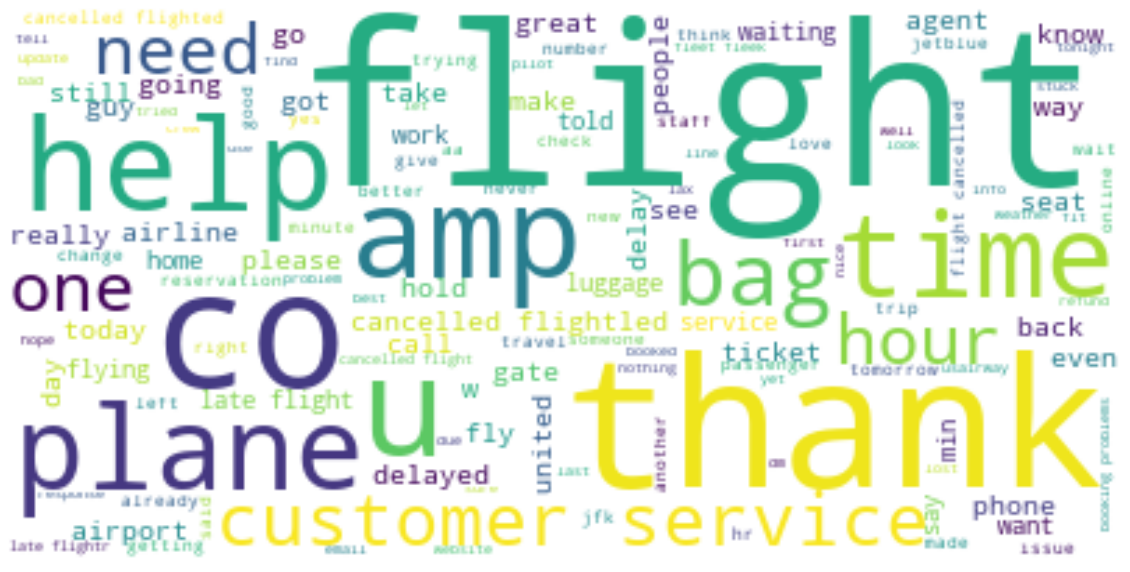

In [36]:
from wordcloud import WordCloud 

text = " ".join(review for review in twDF['text_clean'])
print ("There are {} words in the combination of all review.".format(len(text)))

wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word cloud on -ve sentiments

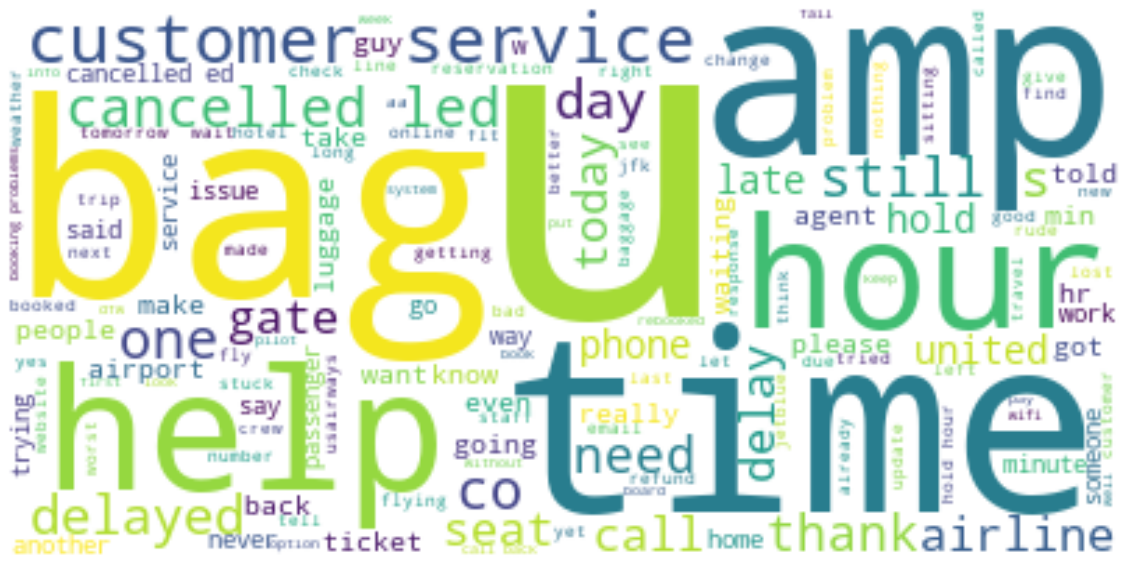

In [37]:
textNeg = " ".join(review for review in twDF['text_clean'].loc[twDF['airline_sentiment']==1])
textNeg=textNeg.replace('flight', '')
textNeg=textNeg.replace('plane', '')
wordcloud = WordCloud(background_color="white").generate(textNeg)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word cloud on +ve sentiments

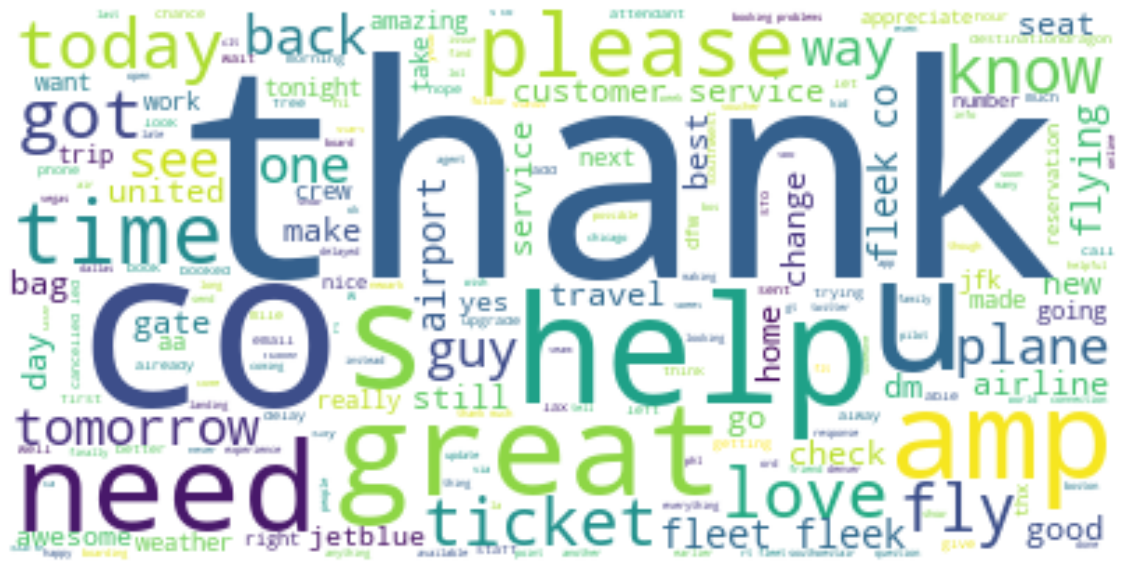

In [38]:
textPos = " ".join(review for review in twDF['text_clean'].loc[twDF['airline_sentiment']==0])
textPos=textPos.replace('flight', '')
textPos=textPos.replace('http', '')
wordcloud = WordCloud(background_color="white").generate(textPos)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Vectorizer

In [39]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(twDF['text_clean'])

data_features = data_features.toarray() 

In [40]:
data_features.shape

(14532, 2000)

In [41]:
labels = twDF['airline_sentiment']
labels = labels.astype('int')

In [42]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [43]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7872289083630036


In [44]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [45]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

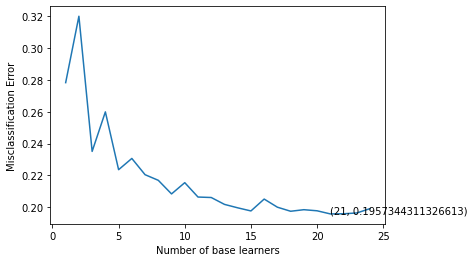

In [46]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [47]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8073394495412844

In [48]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[1091  488]
 [ 352 2429]]
0.8073394495412844


<AxesSubplot:>

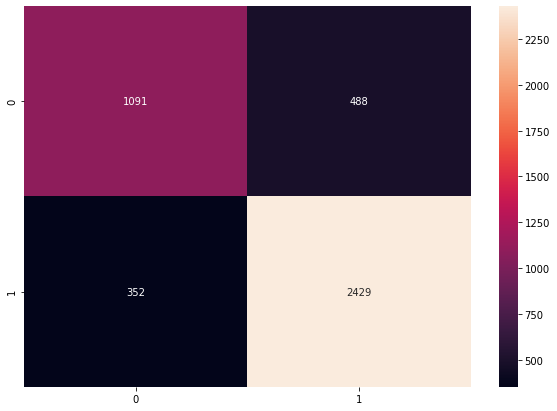

In [49]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

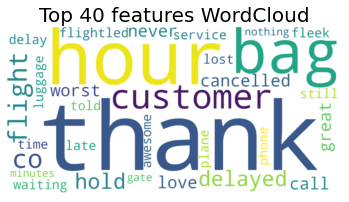

In [50]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

In [51]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(twDF['text_clean'])

data_features = data_features.toarray()

data_features.shape

(14532, 2000)

In [52]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [53]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7983774599176916


In [54]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

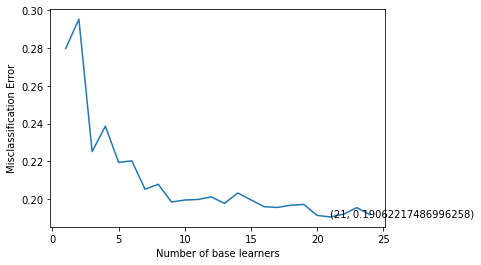

In [55]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [56]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8151376146788991

In [57]:
result = clf.predict(X_test)

[[1079  500]
 [ 306 2475]]
0.8151376146788991


<AxesSubplot:>

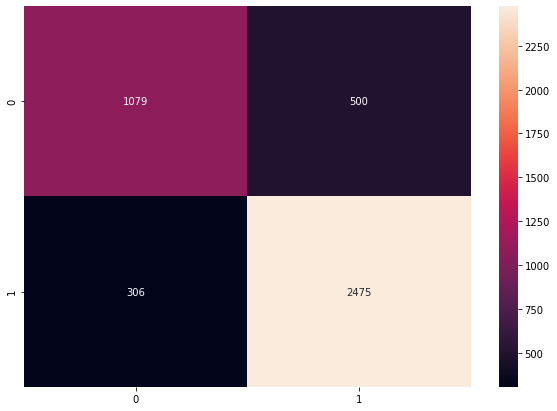

In [58]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

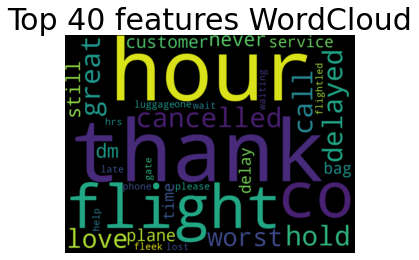

In [59]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

# Conclusion and Insights